In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [2]:
df = pd.read_csv(r'C:\Users\Inayath\Documents\Programming\Python\Kaggle Project\telco-customer-churn\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


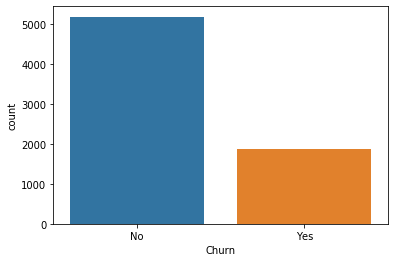

In [5]:
sns.countplot(df['Churn'])

In [6]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [32]:
# df['TotalCharges'] = df['TotalCharges'].str.replace(',','.')
# df['TotalCharges'] = df['TotalCharges'].astype(float)

df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float')
print(df['TotalCharges'].values.dtype)

float64


In [33]:
X = df.drop(['customerID','Churn'], axis=1)
y = df['Churn']

print(X.shape)
print(y.shape)

(7043, 19)
(7043,)


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [35]:
# Select object features
obj = X.select_dtypes(include=[object])

for col in obj:
    print(col)
    print(df[col].unique())

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [36]:
# Select all features types excluding object

no_obj = df.select_dtypes(exclude=[object])

for col in no_obj:
    print(col)
    print(df[col].unique())

SeniorCitizen
[0 1]
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [37]:
print(obj.columns)
print(no_obj.columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [38]:
# Some such as default would be binary features, but since
# they have a third class "unknown" we'll process them as non binary categorical
cat_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [39]:
X[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   Partner           7043 non-null   object
 2   Dependents        7043 non-null   object
 3   PhoneService      7043 non-null   object
 4   MultipleLines     7043 non-null   object
 5   InternetService   7043 non-null   object
 6   OnlineSecurity    7043 non-null   object
 7   OnlineBackup      7043 non-null   object
 8   DeviceProtection  7043 non-null   object
 9   TechSupport       7043 non-null   object
 10  StreamingTV       7043 non-null   object
 11  StreamingMovies   7043 non-null   object
 12  Contract          7043 non-null   object
 13  PaperlessBilling  7043 non-null   object
 14  PaymentMethod     7043 non-null   object
dtypes: object(15)
memory usage: 825.5+ KB


In [40]:
ohe = OneHotEncoder(sparse=False)

In [41]:
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_features)])

# preprocessor = make_column_transformer((ohe, cat_features))
# preprocessor = make_column_transformer((ohe, cat_features), remainder="passthrough")

In [42]:
# Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

# Decision Tree
dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor),
                      ("model", XGBClassifier(n_jobs=-1))])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=0)

In [44]:
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=5, scoring="accuracy")
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['tenure', 'MonthlyCharges', 'TotalCharges']), ('categorical', OneHotEncoder(categorical_features=None, categories=Non...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'model__C': [1, 1.3, 1.5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [45]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1}
0.7464503042596349


In [46]:
lr_model.set_params(**gs.best_params_)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['tenure', 'MonthlyCharges', 'TotalCharges']), ('categorical', OneHotEncoder(categorical_features=None, categories=Non...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [47]:
lr_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['tenure', 'MonthlyCharges', 'TotalCharges']), ('categorical', OneHotEncoder(categorical_features=None, categories=Non...alty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [48]:
y_pred = lr_model.predict(X_test)

In [49]:
lr_model.score(X, y)

0.7501064887121965

In [50]:
accuracy_score(y_test, y_pred)

0.7491717936583058

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.91      0.73      0.81      1552
         Yes       0.52      0.81      0.63       561

   micro avg       0.75      0.75      0.75      2113
   macro avg       0.72      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



## Model explanation with SHAP

In [52]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=0)

In [54]:
xgb_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical', 'passthrough', ['tenure', 'MonthlyCharges', 'TotalCharges']), ('categorical', OneHotEncoder(categorical_features=None, categories=Non...ale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None))])

In [55]:
xgb_model.score(X,y)

0.8994746556864972

In [56]:
explainer = shap.TreeExplainer(xgb_model.named_steps["model"]) 

In [57]:
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

In [58]:
# Reassign each features names
preprocessor = xgb_model.named_steps["preprocessor"]

ohe_categories = preprocessor.named_transformers_["categorical"].categories_

new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]

all_features = num_features + new_ohe_features

In [59]:
# SHAP Force Plot
shap.initjs() 
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=all_features)

In [60]:
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=all_features)

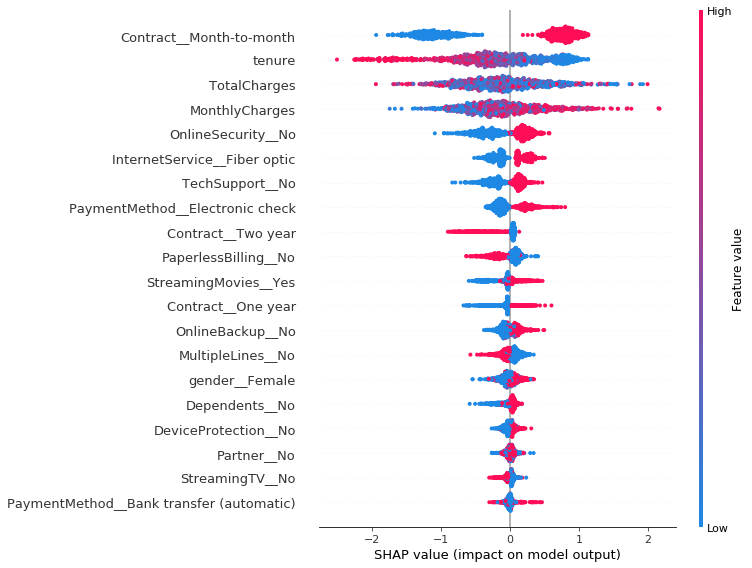

In [61]:
shap.initjs() 
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

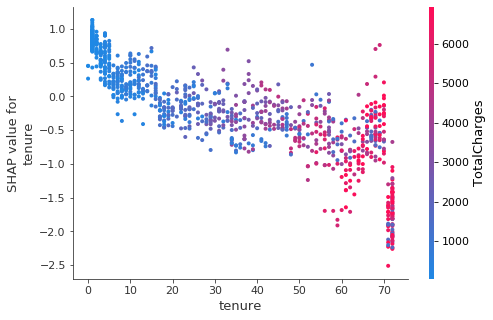

In [62]:
shap.dependence_plot("tenure", shap_values, 
                     pd.DataFrame(observations, columns=all_features))

In [105]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(dt_model.score(X,y))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9162288797387477
0.7283483199242783
              precision    recall  f1-score   support

          No       0.82      0.81      0.81      1552
         Yes       0.49      0.50      0.50       561

   micro avg       0.73      0.73      0.73      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [106]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(rf_model.score(X,y))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9312792843958541
0.7780407004259347
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1552
         Yes       0.61      0.45      0.52       561

   micro avg       0.78      0.78      0.78      2113
   macro avg       0.71      0.67      0.69      2113
weighted avg       0.76      0.78      0.77      2113



In [101]:
print(lr_model.score(X,y))
print(dt_model.score(X,y))
print(rf_model.score(X,y))
print(xgb_model.score(X,y))

0.7501064887121965
0.9156609399403663
0.9329831037909981
0.8994746556864972
